In [98]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 一些默认配置，使得图表更美观
large = 22; med = 16; small = 12
params = {'axes.titlesize': med,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
# 设置matplotlib正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False 

In [114]:
def plot_dist(title, x):
    '''
    绘制质量分布图
    INPUT  -> 标题, 数据集(单变量)
    '''
    plt.figure(figsize=(12,10), dpi= 80)
    sns.distplot(x, hist=True, vertical=True,kde=True, rug=True) # 前两个代表直方图和一元核密度估计图,默认就是True;rug是在最下方显示出频率情况,默认为False
    plt.title(title, fontsize=22)
    plt.show()

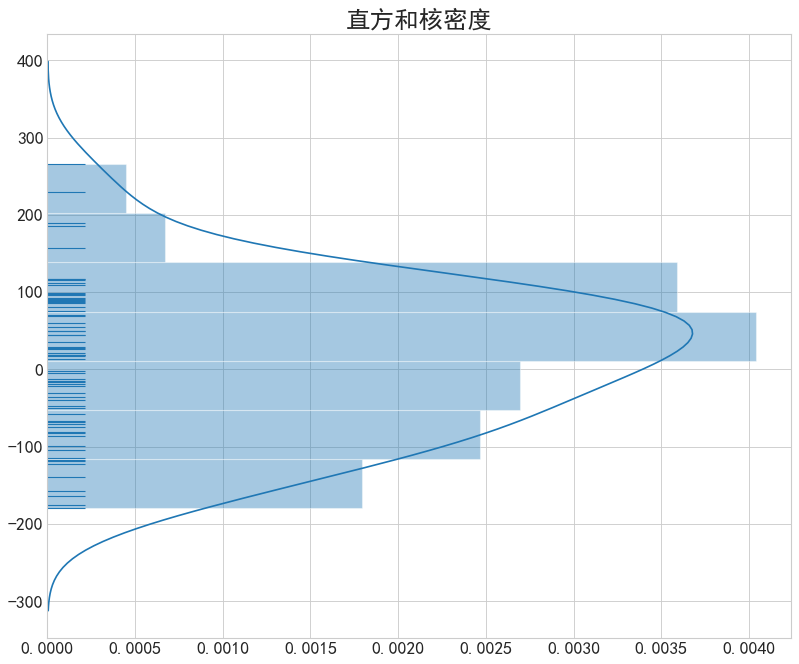

In [115]:
import numpy as np
import pandas as pd
rs = np.random.RandomState(80)
s = pd.Series(rs.randn(70) * 100)
plot_dist('直方和核密度', s)


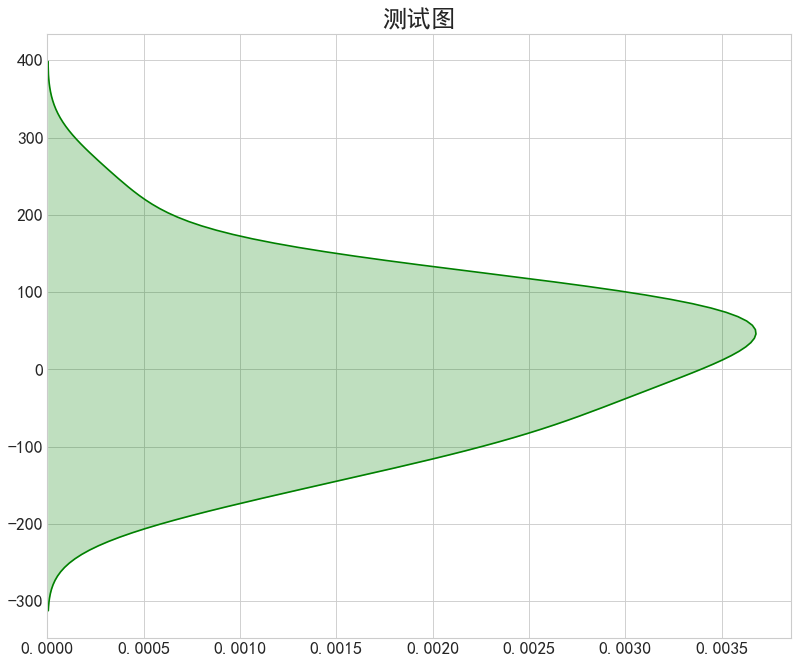

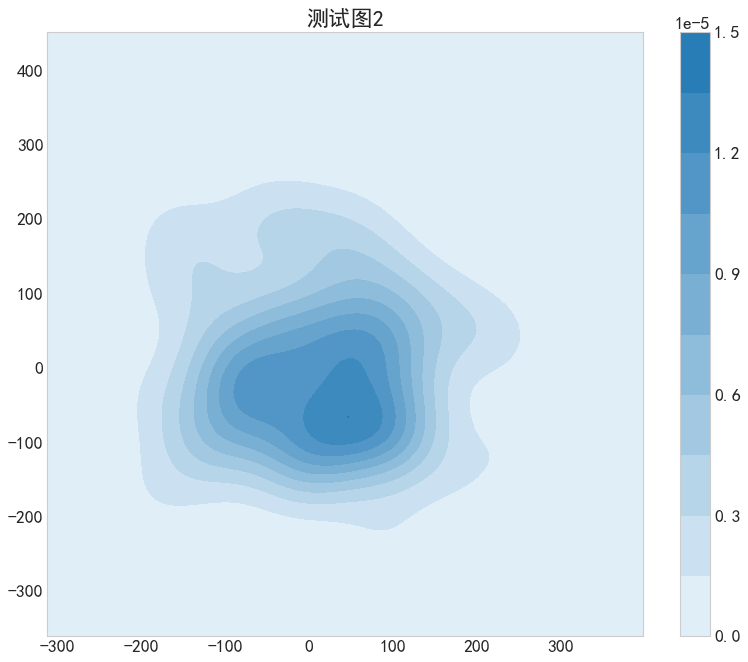

In [117]:
def plot_1kde(title, x, cumulative=False):
    '''
    绘制一元核密度估计图
    INPUT  -> 标题, 数据集(单变量)
    '''
    plt.figure(figsize=(12,10), dpi= 80)
    sns.kdeplot(x, cumulative=False, shade=True, vertical=True,color='g') # cumulative为密度累计, shade表示线下颜色为阴影, color表示颜色是红色
    plt.title(title, fontsize=22)
    plt.show()

def plot_2kde(title, x, y):
    '''
    绘制二元核密度估计图
    INPUT  -> 标题, 字段1, 字段2
    '''
    plt.figure(figsize=(12,10), dpi= 80)
    sns.kdeplot(x, y, shade=True, cbar=True) # cbar表示颜色棒

    plt.title(title, fontsize=20)
    plt.show()

# 生成一些随机数
rs = np.random.RandomState(80)
s = pd.Series(rs.randn(70) * 100)
h = pd.Series(rs.randn(70) * 100)
plot_1kde('测试图', s)
plot_2kde('测试图2', s, h)

In [118]:
def plot_joingrid(x, y):
    '''
    绘制两个变量关系图
    INPUT  -> 字段1, 字段2
    '''

    sns.jointplot(x=x, y=y, # 设置xy轴，显示columns名称
              color = 'g',   # 设置颜色
#               s = 50, edgecolor="w",linewidth=1,  # 设置散点大小、边缘线颜色及宽度(只针对scatter）
              kind = 'hex',   # 设置类型：“scatter”、“reg”、“resid”、“kde”、“hex”
#               space = 0.2,  # 设置散点图和布局图的间距
              height = 5,   # 图表大小（自动调整为正方形）}
              ratio = 4,  # 散点图与布局图高度比，整型
              marginal_kws=dict(bins=15, rug=True)  # 设置柱状图箱数，是否设置rug
              ).set_axis_labels("X","Y")

    plt.show()



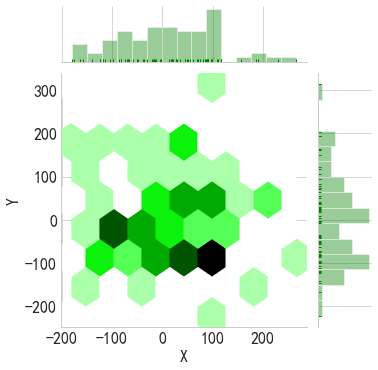

In [119]:
# 生成一些随机数
rs = np.random.RandomState(80)
s = pd.Series(rs.randn(70) * 100)
h = pd.Series(rs.randn(70) * 100)
plot_joingrid(s, h)

In [120]:
def plot_pairgrid1(x, y):
    '''
    绘制分类散点图
    INPUT  -> 分组列, 统计列
    '''
    colors = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
    sns.stripplot(x=x,   # 设置分组统计字段
                  y=y,   # 数据分布统计字段    
                  # 这里xy数据对调，会使得散点图横向分布
                  jitter=0.05,  # jitter代表设置抖动
                  edgecolor = 'w', linewidth = 1, marker = 'o',
                  palette=colors)  
    plt.show()

def plot_pairgrid2(x, y):
    '''
    绘制分簇散点图
    INPUT  -> 分组列, 统计列
    '''
    colors = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
    sns.swarmplot(x=x,   # 设置分组统计字段
                  y=y,   # 数据分布统计字段    
                  # 这里xy数据对调，会使得散点图横向分布
                  edgecolor = 'w', linewidth = 1, marker = 'o',
                  palette=colors)  
    plt.show()

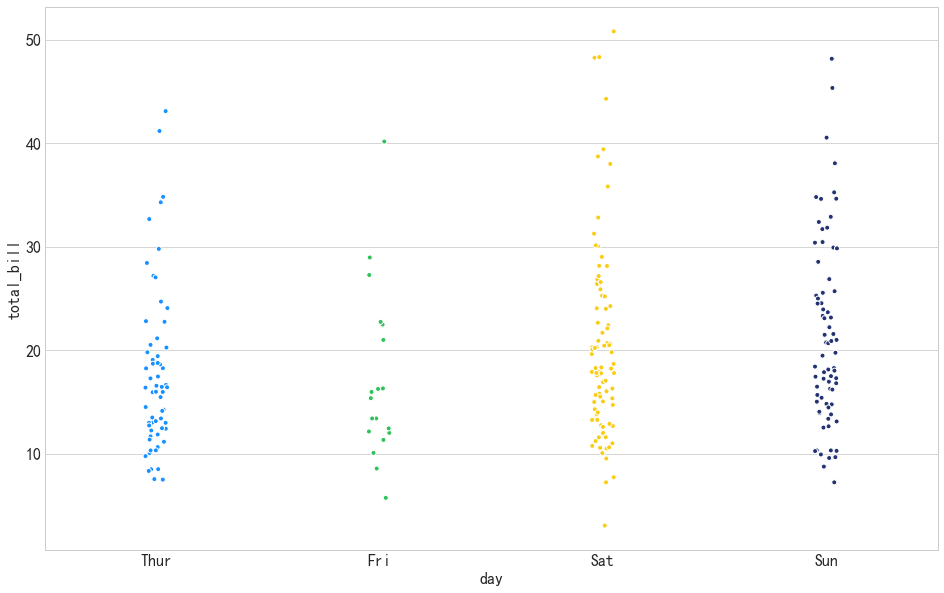

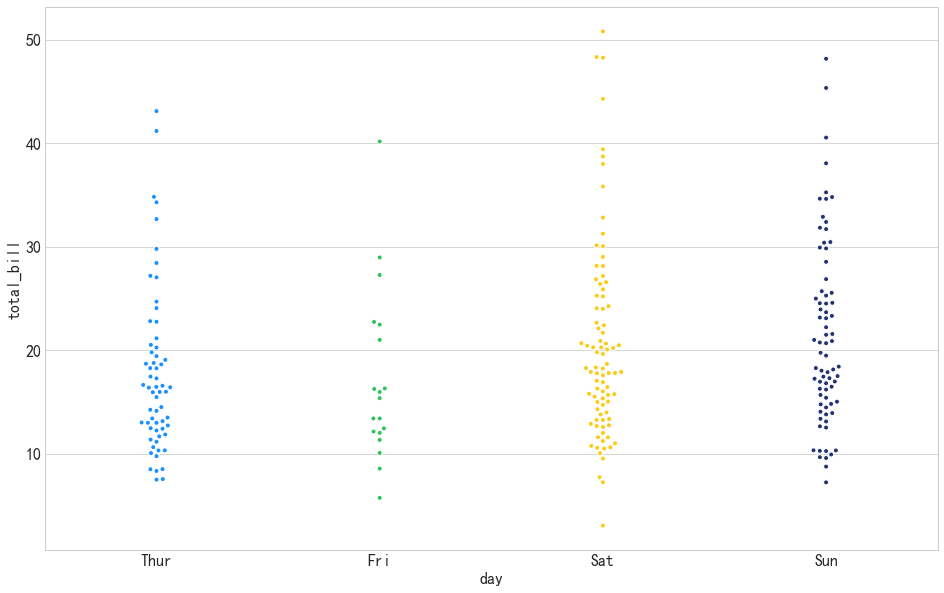

In [121]:
tips = sns.load_dataset('tips')
plot_pairgrid1(tips['day'], tips['total_bill'])
plot_pairgrid2(tips['day'], tips['total_bill'])

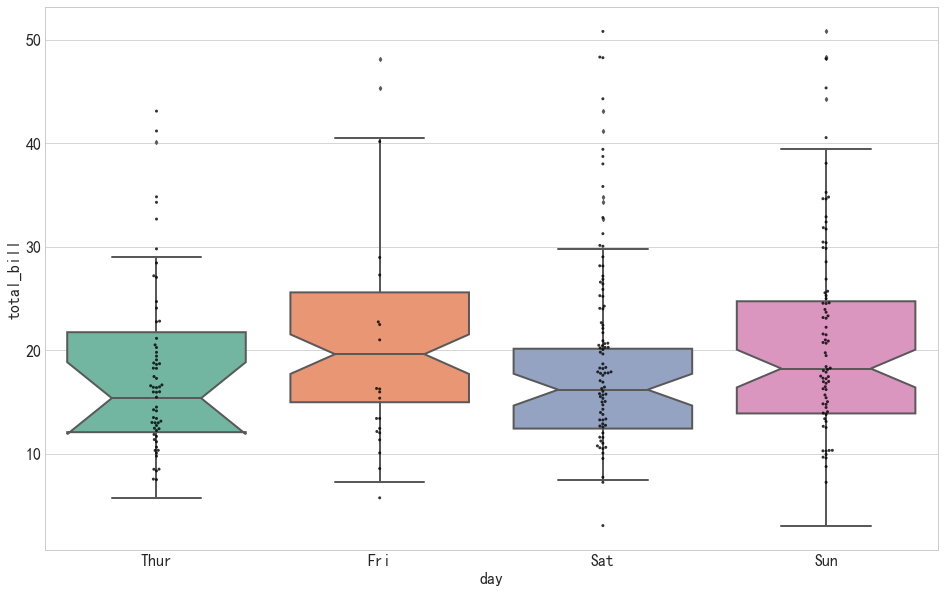

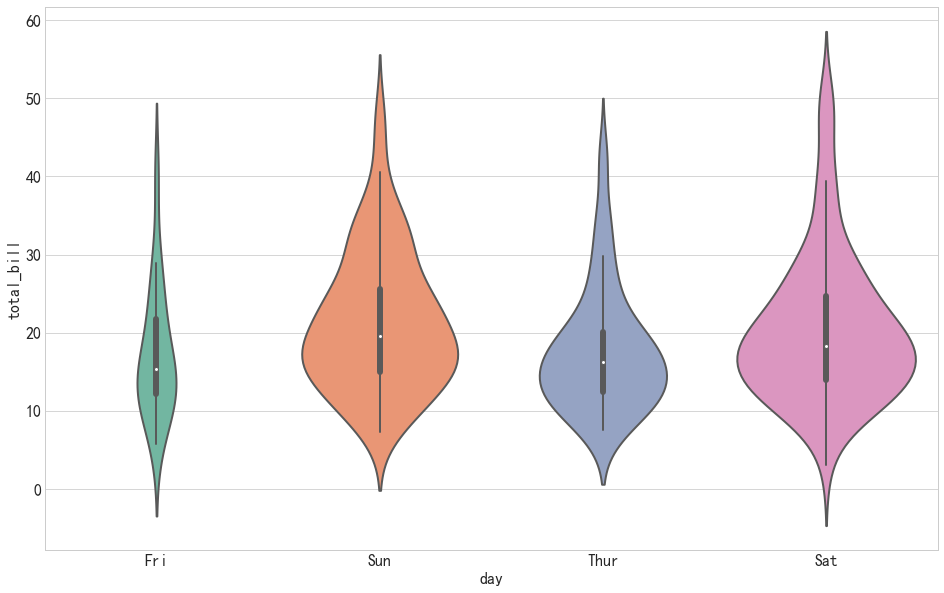

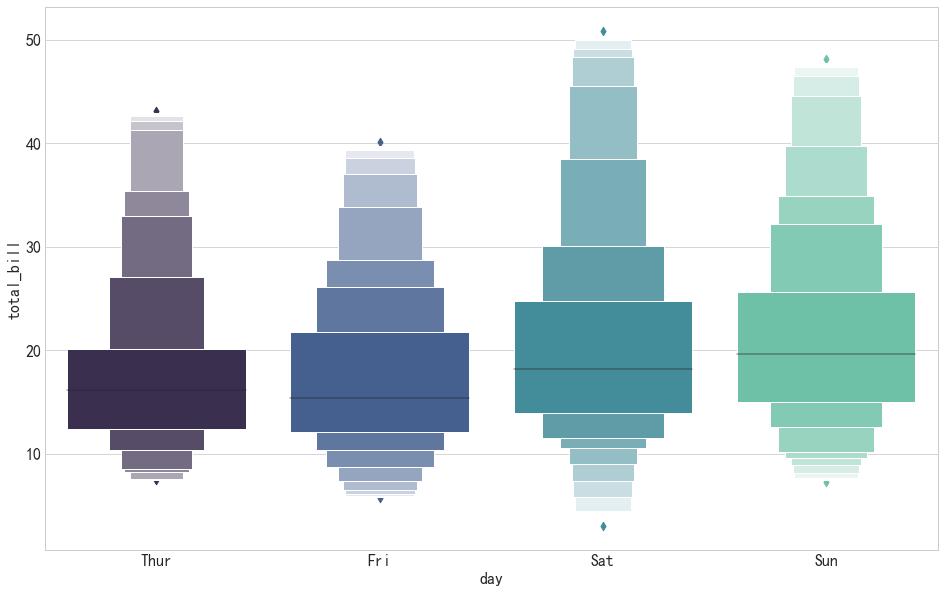

In [122]:
def plot_box(x, y):
    '''
    绘制箱体图
    INPUT  -> 字段1, 字段2
    '''
    sns.boxplot(x = x, y = y, 
                # data = df,
                linewidth = 2, #线宽
                width = 0.8, # 箱之间的间隔比例
                fliersize = 3, #异常点大小
                whis = 1.5,     #设置IQR
                notch = True,   #设置是否以中值做凹槽
                order = {'Thur','Fri','Sat','Sun'}, # 筛选类别
                palette='Set2'  #设置调色板
                )
    #可以添加散点图
    sns.swarmplot(x = x, y = y, color = 'k', size = 3, alpha = 0.8)
    plt.show()

def plot_violin(x, y):
    '''
    绘制小提琴图
    INPUT  -> 字段1, 字段2
    '''
    sns.violinplot(x = x, y = y, 
                # data = df,
                linewidth = 2, # 线宽
                width = 0.8, # 箱之间的间隔比例
                fliersize = 3, # 异常点大小
                whis = 1.5,     # 设置IQR
                notch = True,   # 设置是否以中值做凹槽
                scale = 'count',  # 测度小提琴图的宽度: area-面积相同,count-按照样本数量决定宽度,width-宽度一样
                order = {'Thur','Fri','Sat','Sun'}, # 筛选类别
                palette='Set2',  #设置调色板
                # hue = z,   # 按z再细分
                # split = True, # 设置是否按z拆分小提琴图
                )
    plt.show()

def plot_lv(x, y):
    '''
    绘制LV图(信值图)
    INPUT  -> 字段1, 字段2
    '''
    sns.boxenplot(x = x, y = y, 
                # data = df,
                palette = 'mako',
                linewidth = 12, # 线宽
                width = 0.8, # 箱之间的间隔比例
                scale = 'area', # 设置框的大小:'linear'、'exonential'、'area'
                k_depth = 'proportion' # 设置框的数量:'proportion','tukey','trustworthy'
                )
    plt.show()

tips = sns.load_dataset('tips')
plot_box(tips['day'], tips['total_bill'])
plot_violin(tips['day'], tips['total_bill'])
plot_lv(tips['day'], tips['total_bill'])

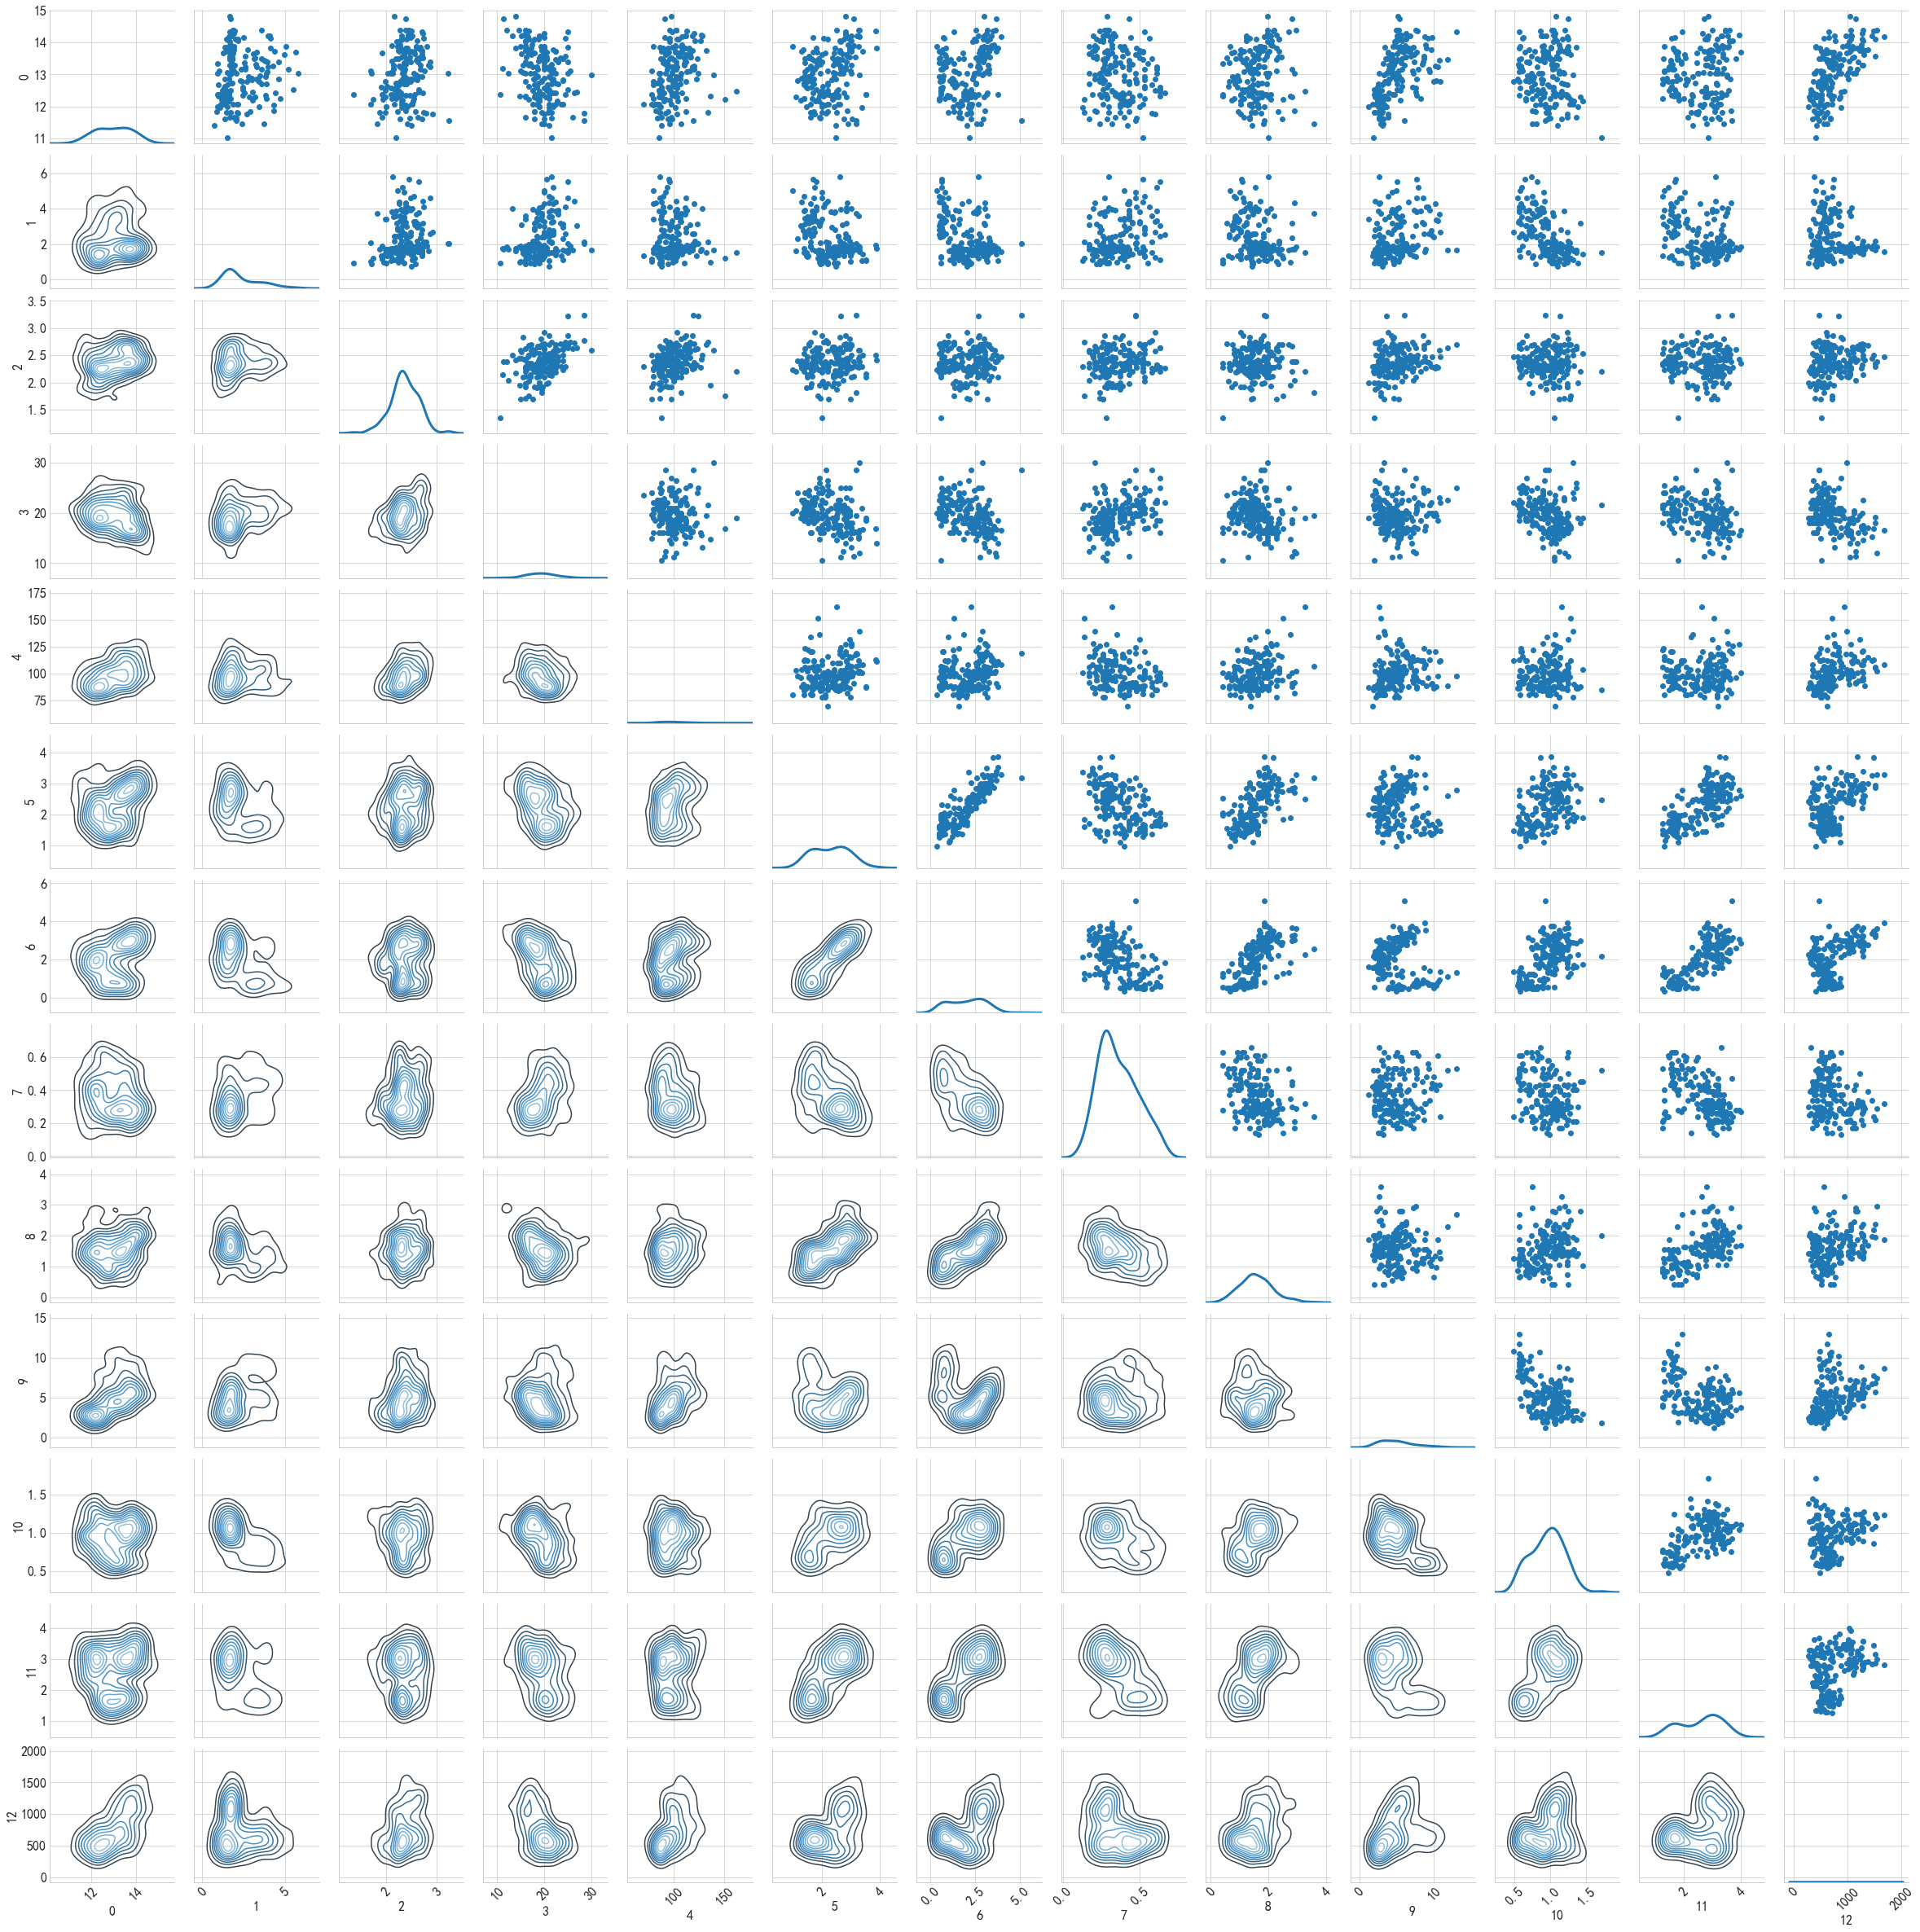

In [125]:
from sklearn.datasets import load_wine

wine=load_wine()
wine_df=pd.DataFrame(wine.data)

def plot_pairgrid(df, mark=None):
    '''
    绘制矩阵图
    INPUT  -> 数据集, 分类标签
    '''
    g = sns.PairGrid(data=df, 
                     hue=mark)  
                     # vars=["sepal_width", "sepal_length"]  vars:需要组合的数据字段 
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)   # 单变量
    # g = g.map_offdiag(plt.scatter)   
    g = g.map_upper(plt.scatter) 
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45)

    plt.show()

plot_pairgrid(wine_df)


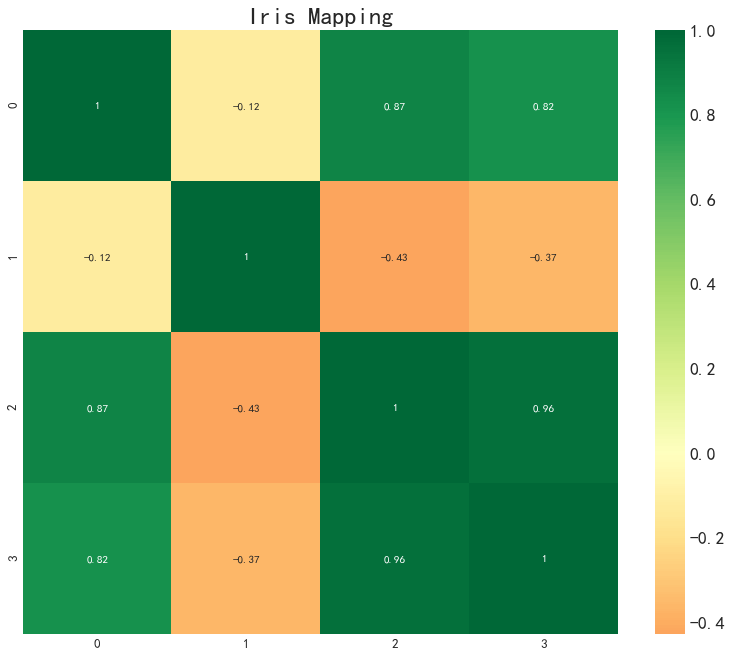

In [145]:
from sklearn.datasets import load_iris

iris=load_iris()
iris_df=pd.DataFrame(iris.data)

def plot_heatmap(title, df): 
    '''
    绘制热力图
    INPUT  -> 标题, 数据集
    '''
    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.show()
    
plot_heatmap("Iris Mapping",iris_df)

In [142]:

def plot_timeseries(x, y, title, df): 
    '''
    绘制时序图
    INPUT  -> 时间字段, 数量字段, 标题, 数据集
    '''
    plt.figure(figsize=(16,10), dpi= 80)
    plt.plot(x, y, data=df, color='tab:red')

    plt.ylim(0, 1000)  # y轴显示范围
    xtick_location = df.index.tolist()[::12]  # x轴取最近12个
    xtick_labels = [i[-4:] for i in df.date.tolist()[::12]]  # 年份
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
    plt.yticks(fontsize=12, alpha=.7)
    
    plt.title(title, fontsize=22)
    plt.grid(axis='both', alpha=.3)
    # 移除边框
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()
